<a href="https://colab.research.google.com/github/akhilvjose/Fruits_360_Deep_Learn/blob/master/Fruits_360_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akhilvjose","key":"71f5d23a7e193f84b6b261dca03a4434"}'}

In [6]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Dec 31 10:50 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#!kaggle datasets list

In [9]:
!kaggle datasets list -s fruits

ref                                                 title                                               size  lastUpdated          downloadCount  
--------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
rdayala/fruits                                      fruits                                              234B  2018-01-10 10:36:27            129  
mjamilmoughal/fruits-with-colors-dataset            Fruits with colors dataset                          776B  2018-01-13 10:22:33            693  
raghu07/vegetable-and-fruits-price-in-india         Daily Vegetable and Fruits Prices data  2010-2018   18MB  2018-03-16 15:57:36            447  
sriramr/fruits-fresh-and-rotten-for-classification  Fruits fresh and rotten for classification           2GB  2018-08-24 15:05:40             41  
moltean/fruits                                      Fruits 360 dataset                                 644MB  2018-12-

In [10]:
!kaggle datasets download -d moltean/fruits 

100% 641M/644M [00:15<00:00, 31.0MB/s]
100% 644M/644M [00:15<00:00, 44.6MB/s]


In [11]:
!ls 

fruits.zip  kaggle.json  sample_data


In [0]:
import zipfile

In [0]:
with zipfile.ZipFile('fruits.zip', 'r') as zip_ref:
  zip_ref.extractall('fruits')

In [14]:
!ls fruits/fruits-360

LICENSE  papers  readme.md  Test  test-multiple_fruits	Training


In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
train_path = 'fruits/fruits-360/Training'
test_path = 'fruits/fruits-360/Test'

In [0]:
from glob import glob
# useful for getting number of files. Not for reading images. That will be done here by flow from directory
image_files = glob(train_path + '/*/*.jp*g')
test_image_files = glob(test_path + '/*/*.jp*g')

In [0]:
# useful for getting number of classes
folders = glob(train_path + '/*')

In [19]:
len(folders)

90

In [20]:
print (folders)

['fruits/fruits-360/Training/Apple Red 2', 'fruits/fruits-360/Training/Grape Blue', 'fruits/fruits-360/Training/Physalis with Husk', 'fruits/fruits-360/Training/Cactus fruit', 'fruits/fruits-360/Training/Cantaloupe 1', 'fruits/fruits-360/Training/Chestnut', 'fruits/fruits-360/Training/Quince', 'fruits/fruits-360/Training/Cantaloupe 2', 'fruits/fruits-360/Training/Cherry Wax Red', 'fruits/fruits-360/Training/Apple Red Yellow 2', 'fruits/fruits-360/Training/Banana Lady Finger', 'fruits/fruits-360/Training/Raspberry', 'fruits/fruits-360/Training/Physalis', 'fruits/fruits-360/Training/Tomato Cherry Red', 'fruits/fruits-360/Training/Apple Golden 2', 'fruits/fruits-360/Training/Apricot', 'fruits/fruits-360/Training/Mangostan', 'fruits/fruits-360/Training/Grape White 2', 'fruits/fruits-360/Training/Pineapple Mini', 'fruits/fruits-360/Training/Dates', 'fruits/fruits-360/Training/Cherry Rainier', 'fruits/fruits-360/Training/Lychee', 'fruits/fruits-360/Training/Carambula', 'fruits/fruits-360/Tra

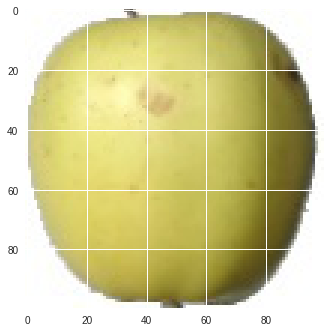

In [21]:
import matplotlib.pyplot as plt
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [0]:
IMAGE_SIZE = [100, 100] # feel free to change depending on dataset

# training config:
epochs = 5
batch_size = 32

In [23]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3],
            weights='imagenet',
            include_top=False)

58892288/58889256 [==============================] - 6s 0us/step


In [0]:
for layer in vgg.layers:
  layer.trainable = False

In [0]:
#vgg.summary()

In [0]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [26]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [0]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [0]:
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input, 
  #validation_split=0.2
)

 # validation split instead of image_List path from glob in: train_samples, validation_samples = train_test_split(Image_List, test_size=0.2)

In [74]:
train_generator = gen.flow_from_directory(
    train_path, #defined earlier
    target_size=IMAGE_SIZE, #(img_height, img_width)
    shuffle=True,
    batch_size =32 ,
    class_mode='categorical',
    #subset='training' # set as training data
)

validation_generator = gen.flow_from_directory(
    test_path, # same directory as training data
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size =32 ,
    class_mode='categorical',
    ) # set as validation data

# Test data is validation data.so no validation split
# validation_generator = gen.flow_from_directory(
#     train_path, # same directory as training data
#     target_size=IMAGE_SIZE,
#     shuffle=True,
#     batch_size =32 ,
#     class_mode='categorical',
#     subset='validation') # set as validation data

Found 46371 images belonging to 90 classes.
Found 15563 images belonging to 90 classes.


In [75]:
train_generator.class_indices.items()

dict_items([('Apple Braeburn', 0), ('Apple Golden 1', 1), ('Apple Golden 2', 2), ('Apple Golden 3', 3), ('Apple Granny Smith', 4), ('Apple Red 1', 5), ('Apple Red 2', 6), ('Apple Red 3', 7), ('Apple Red Delicious', 8), ('Apple Red Yellow 1', 9), ('Apple Red Yellow 2', 10), ('Apricot', 11), ('Avocado', 12), ('Avocado ripe', 13), ('Banana', 14), ('Banana Lady Finger', 15), ('Banana Red', 16), ('Cactus fruit', 17), ('Cantaloupe 1', 18), ('Cantaloupe 2', 19), ('Carambula', 20), ('Cherry 1', 21), ('Cherry 2', 22), ('Cherry Rainier', 23), ('Cherry Wax Black', 24), ('Cherry Wax Red', 25), ('Cherry Wax Yellow', 26), ('Chestnut', 27), ('Clementine', 28), ('Cocos', 29), ('Dates', 30), ('Granadilla', 31), ('Grape Blue', 32), ('Grape Pink', 33), ('Grape White', 34), ('Grape White 2', 35), ('Grape White 3', 36), ('Grape White 4', 37), ('Grapefruit Pink', 38), ('Grapefruit White', 39), ('Guava', 40), ('Huckleberry', 41), ('Kaki', 42), ('Kiwi', 43), ('Kumquats', 44), ('Lemon', 45), ('Lemon Meyer', 46

In [76]:
# test generator to see how it works and some other useful things

# get label mapping for confusion matrix plot later
test_gen = gen.flow_from_directory(test_path, target_size=IMAGE_SIZE)

print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices) #defining empty vaector
for k, v in test_gen.class_indices.items():
  labels[v] = k #giving labels v-0,1,2,3....89, k=Apple ,....

Found 15563 images belonging to 90 classes.
{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow 1': 9, 'Apple Red Yellow 2': 10, 'Apricot': 11, 'Avocado': 12, 'Avocado ripe': 13, 'Banana': 14, 'Banana Lady Finger': 15, 'Banana Red': 16, 'Cactus fruit': 17, 'Cantaloupe 1': 18, 'Cantaloupe 2': 19, 'Carambula': 20, 'Cherry 1': 21, 'Cherry 2': 22, 'Cherry Rainier': 23, 'Cherry Wax Black': 24, 'Cherry Wax Red': 25, 'Cherry Wax Yellow': 26, 'Chestnut': 27, 'Clementine': 28, 'Cocos': 29, 'Dates': 30, 'Granadilla': 31, 'Grape Blue': 32, 'Grape Pink': 33, 'Grape White': 34, 'Grape White 2': 35, 'Grape White 3': 36, 'Grape White 4': 37, 'Grapefruit Pink': 38, 'Grapefruit White': 39, 'Guava': 40, 'Huckleberry': 41, 'Kaki': 42, 'Kiwi': 43, 'Kumquats': 44, 'Lemon': 45, 'Lemon Meyer': 46, 'Limes': 47, 'Lychee': 48, 'Mandarine': 49, 'Mango': 50, '

In [0]:
# import cv2
# # should be a strangely colored image (due to VGG weights being BGR)
# for x, y in validation_generator:
#   print("min:", x[0].min(), "max:", x[0].max())
#   plt.title(labels[np.argmax(y[0])])
#   plt.imshow((x[0]-x[0].min())/x[0].max())
#   plt.show()
#   break

In [78]:
r = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs-2,
  steps_per_epoch= train_generator.n // batch_size,
  validation_steps=validation_generator.n // batch_size,
)

Epoch 1/3
1449/1449 [==============================] - 251s 173ms/step - loss: 7.4660 - acc: 0.5356 - val_loss: 7.4883 - val_acc: 0.5324
Epoch 2/3
1449/1449 [==============================] - 249s 172ms/step - loss: 7.4000 - acc: 0.5400 - val_loss: 7.4645 - val_acc: 0.5339
Epoch 3/3
1449/1449 [==============================] - 250s 172ms/step - loss: 7.3984 - acc: 0.5405 - val_loss: 7.4243 - val_acc: 0.5371


In [0]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [82]:
cm = get_confusion_matrix(train_path, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(test_path, len(test_image_files))
print(valid_cm)

Generating confusion matrix 46371
Found 46371 images belonging to 90 classes.
50
100
150
200
250
300
350
400
450
500
550
600
650
700
[[  0   0   0 ...   0   1   0]
 [  0 492   0 ...   0   0   0]
 [  0   2   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 367   0]
 [  0   0   0 ...   0   0 735]]
Generating confusion matrix 15563
Found 15563 images belonging to 90 classes.
50
100
150
200
[[  0   0   0 ...   0   0   0]
 [  0 163   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 125   0]
 [  0   0   0 ...   0   0 249]]


In [84]:
!pip install util

  Could not find a version that satisfies the requirement util (from versions: )
No matching distribution found for util


(<matplotlib.figure.Figure at 0x7f7b2dd3ff28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7b347bc630>)

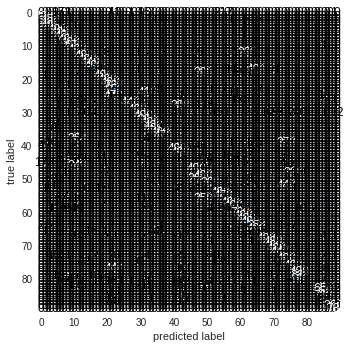

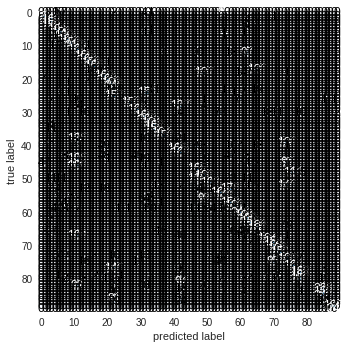

In [88]:
from mlxtend.plotting import plot_confusion_matrix
#from util import plot_confusion_matrix
#plot_confusion_matrix(cm, labels, title='Train confusion matrix')
plot_confusion_matrix(cm)
plot_confusion_matrix(valid_cm, labels)

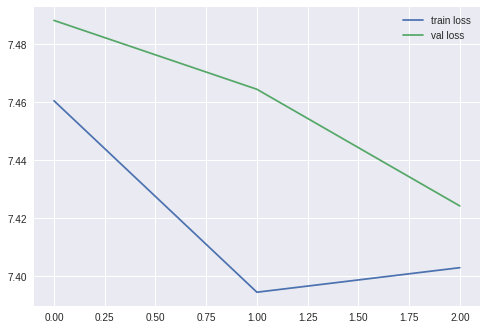

In [89]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

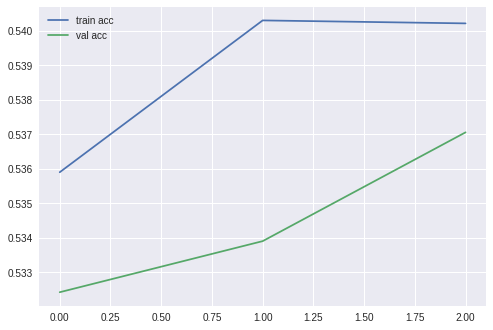

In [90]:
# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()